In [1]:
################################################################################
# EigenFaces based Pokemon Classfier                                           #
# ---------------------------------------------------------------------------- #
# ~600 images of 20 pokemon are used to classify them.                         #
# PCA is applied to remove noise in the data. SVM, with Grid Search CV, is     #
# used for classification. The model is a based on EigenFaces. But unlike      #
# original EigenFaces, this model retains color because pokemon are usually    #
# distinctly colored unlike a face.                                            #
# ---------------------------------------------------------------------------- #
# NOTE: The first version of my model is put in v1_scripts directory.          #
################################################################################

%pylab inline
from PIL import Image, ImageOps
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

from time import time
import os

"""
Read images as features and labels
"""
X = []
y = []

for root, dirs, files in os.walk('dataset/'):
    for f in files:
        imgF = Image.open(os.path.join(root, f)).convert('RGB') # Open the file in RGB mode
        imgF = ImageOps.fit(image=imgF, size=(64, 64), method=Image.ANTIALIAS) # Crop the image
        
        X.append(np.array(imgF))
        y.append(root.split('/')[1])
   
# Convert to np.array
X = np.array(X).reshape((-1, 64 * 64 * 3)) # reshaped to 1D for PCA
y = np.array(y)

print(X.shape, y[:5])

Populating the interactive namespace from numpy and matplotlib
(596, 12288) ['abra' 'abra' 'abra' 'abra' 'abra']


In [2]:
"""
Test Train Split
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=67)

print(X_train.shape, X_test.shape)

(399, 12288) (197, 12288)


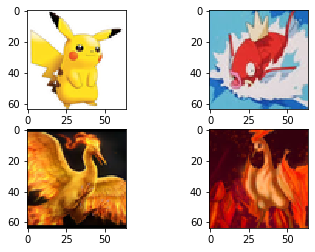

In [3]:
"""
Original Images
"""

X_train_3D = X_train.reshape(-1, 64, 64, 3)
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(X_train_3D[0])
axarr[0,1].imshow(X_train_3D[1])
axarr[1,0].imshow(X_train_3D[2])
axarr[1,1].imshow(X_train_3D[3])

plt.show()

In [4]:
"""
Compute PCA
"""
print('Computing PCA...')
t0 = time()

pca = PCA(n_components=0.80)
pca.fit(X)
X_train_pca = pca.transform(X_train)
X_test_pca  = pca.transform(X_test)

print('PCA Computed: {}'.format(time() - t0))

print(X_train_pca.shape)

Computing PCA...
PCA Computed: 3.2585771083831787
(399, 57)


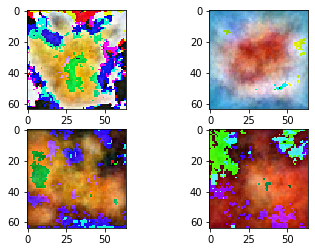

In [5]:
"""
PCA reduced images
"""

XInv = pca.inverse_transform(X_train_pca)
XInv = XInv.reshape((-1, 64, 64, 3))

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(XInv[0].astype('uint8'))
axarr[0,1].imshow(XInv[1].astype('uint8'))
axarr[1,0].imshow(XInv[2].astype('uint8'))
axarr[1,1].imshow(XInv[3].astype('uint8'))

plt.show()

In [6]:
"""
Training SVM using GridSearchCV for hyperparam selection
"""
param_grid = {
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'C': [1, 1e3, 5e3, 1e4, 5e4, 1e5], 
}

print('training...')
t0 = time()

clf = GridSearchCV(SVC(), param_grid)
clf = clf.fit(X_train_pca, y_train)

print('Training Duration: {}'.format(time() - t0))

training...
Training Duration: 1.6556487083435059


In [7]:
"""
Accuracy
"""
train_accuracy = clf.score(X_train_pca, y_train)
test_accuracy = clf.score(X_test_pca, y_test)

print("Train Accuracy: ", train_accuracy) # Overfits
print("Test Accuracy: ", test_accuracy)

Train Accuracy:  1.0
Test Accuracy:  0.5583756345177665
